# Text Classification Project

## Implementation 

In [25]:
from os import listdir
import os
import numpy as np
import operator
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

Function "score" receives path of sub-folders which gives actual newsgroup and predictions. It returns ratio of correct predictions to total predictions

In [26]:
def score(path, predictions):
    folders_name, folders_path, file_path = files_path(path)
    length = []
    for folder_path in folders_path:
        length.append(len(os.listdir(folder_path)))
    y_test = []
    k = 0
    for name in folders_name:
        for i in range(length[k]):
            y_test.append(name)       # storing correct results in y_test
        k += 1
            
    correct = 0
    for i in range(len(predictions)):
        if(predictions[i] == y_test[i]):    # checking which prediction is correct
            correct += 1
    return (correct / len(y_test))

Function "mn_naive_bayes" calculates probability of a document to fall under some news group

In [27]:
def mn_naive_bayes(sub_dict, words, total):
    prob = -1    # assigning invalid probability to prob
    # iterating to all the words of a document
    # and calculating the probability
    # to fall under the document: sub_dict[key]
    for word in words:
        if(word in sub_dict):
            prob += (np.log2(sub_dict[word] + 1) - np.log2(sub_dict["total_count"] + total))
    prob += (np.log2(sub_dict["total_count"]) - np.log2(total))
    return prob

Function "find_prediction" to calculate best probability of a document to fall under a particular news group

In [28]:
def find_prediction(dictionary, file_path):
    l_words = read_file(file_path)  # storing all words of a document
    words = clean_data(l_words)     # cleaning the stored words
    prob = -1                       # assigning invalid probability to prob
    best_prob = -1000000
    news_grp = ''
    dict_keys = dictionary.keys()    # storing all the possible newsgroup in dict_keys
    # iterating for all the newsgroup
    # and finding probability for each newsgroup
    # and updating the best probability 
    # if a better probability is found
    for key in dict_keys:
        if(key != 'total'):
            prob = mn_naive_bayes(dictionary[key], words, dictionary["total"])
            if(prob > best_prob):
                news_grp = key
                best_prob = prob
    return news_grp

Function "predict" receives the dictionary of most frequent words along with their frequency and path of files to be tested. It maintains a list of predictions and returns it

In [29]:
def predict(dictionary, test_path):
    folders_name, folders_path, file_path = files_path(test_path)
    predictions = []   # list to store correct predictions
    for file_path in file_path:
        pred = find_prediction(dictionary, file_path)  # calling find_prediction which gives correct prediction of a file
        predictions.append(pred)
    return predictions

Function "files_path" receives the path of the directory and returns the name of folders inside it, their path and the path of the files inside the sub folders

In [30]:
def files_path(base_path):
    folders_name = listdir(base_path)  # storing the names of the folders inside folders_name
    folders_path = []
    # iterating for each folder name
    # and storing their absolute path inside folders_path
    for folder_name in folders_name:
        folders_path.append(base_path + "\\" + folder_name)
    file_path = []
    # iterating for all the sub folders 
    # and storing the path of files inside it
    for folder_path in folders_path:
        l = os.listdir(folder_path)
        for i in l:
            file_path.append(folder_path + "\\" + i)
    return folders_name, folders_path, file_path

In [31]:
def stem_word(pos):
    if pos.startswith('N'):
        return 'n'
    elif pos.startswith('J'):
        return 'a'
    elif pos.startswith('R'):
        return wordnet.ADV
    elif pos.startswith('V'):
        return 'v'
    else:
        return 'n'

Funtion "clean_data" receives a list of words. It removes all the stopwords and empty strings and makes it suitable for making a dictionary of words which contains useful information

In [32]:
def clean_data(l):
    all_words = []
    sp = ["", " "]
    stopwords = ["a","about","above","according","across","actually","ad","adj","ae","af","after","afterwards","ag","again",
                 "against","ai","al","all","almost","alone","along","already","also","although","always","am","among","amongst",
                 "an","and","another","any","anyhow","anyone","anything","anywhere","ao","aq","ar","are","aren","arent","around",
                 "arpa","as","at","au","aw","az","b","ba","bb","bd","be","became","because","become","becomes","becoming","been",
                 "before","beforehand","begin","beginning","behind","being","below","beside","besides","between","beyond","bf",
                 "bg","bh","bi","bj","bm","bn","bo","both","br","bs","bt","but","buy","bv","bw","by","bz","c","ca","can",
                 "cannot","cant","caption","cc","cd","cf","cg","ch","ci","ck","cl","click","cm","cn","co","co.","com","copy",
                 "could","couldn","couldnt","cr","cs","cu","cv","cx","cy","cz","d","de","did","didn","didnt","dj","dk","dm","do",
                 "does","doesn","doesnt","don","dont","down","during","dz","e","each","ec","edu","ee","eg","eh","eight","eighty",
                 "either","else","elsewhere","end","ending","enough","er","es","et","etc","even","ever","every","everyone",
                 "everything","everywhere","except","f","few","fi","fifty","find","first","five","fj","fk","fm","fo","for",
                 "former","formerly","forty","found","four","fr","free","from","further","fx","g","ga","gb","gd","ge","get",
                 "gf","gg","gh","gi","gl","gm","gmt","gn","go","gov","gp","gq","gr","gs","gt","gu","gw","gy","h","had","has",
                 "hasn","hasnt","have","haven","havent","he","hed","hell","help","hence","her","here","hereafter","hereby",
                 "herein","heres","hereupon","hers","herself","hes","him","himself","his","hk","hm","hn","home","homepage",
                 "how","however","hr","ht","htm","html","http","hu","hundred","i","i.e.","id","ie","if","ii","il","ill","im",
                 "in","inc","inc.","indeed","information","instead","int","into","io","iq","ir","is","isn","isnt","it","its",
                 "itself","ive","j","je","jm","jo","join","jp","k","ke","kg","kh","ki","km","kn","kp","kr","kw","ky","kz","l",
                 "la","last","later","latter","lb","lc","least","length","less","let","lets","li","like","likely","lk","ll","lr",
                 "ls","lt","ltd","lu","lv","ly","m","ma","made","make","makes","many","maybe","mc","md","me","meantime",
                 "meanwhile","mg","mh","might","mil","miss","mk","ml","mm","mn","mo","more","moreover","most","mostly","mp","mq",
                 "mr","mrs","ms","msie","mt","mu","much","must","mv","mw","mx","my","myself","mz","n","na","namely","nc","ne",
                 "neither","net","netscape","never","nevertheless","new","next","nf","ng","ni","nine","ninety","nl","no",
                 "nobody","none","nonetheless","noone","nor","not","nothing","now","nowhere","np","nr","nu","nz","o","of","off",
                 "often","om","on","once","one","ones","only","onto","or","org","other","others","otherwise","our","ours",
                 "ourselves","out","over","overall","own","p","pa","page","pe","per","perhaps","pf","pg","ph","pk","pl","pm",
                 "pn","pr","pt","pw","py","q","qa","r","rather","re","recent","recently","reserved","ring","ro","ru","rw","s",
                 "sa","same","sb","sc","sd","se","seem","seemed","seeming","seems","seven","seventy","several","sg","sh","she",
                 "shed","shell","shes","should","shouldn","shouldnt","si","since","site","six","sixty","sj","sk","sl","sm","sn",
                 "so","some","somehow","someone","something","sometime","sometimes","somewhere","sr","st","still","stop","su",
                 "such","sv","sy","sz","t","taking","tc","td","ten","test","text","tf","tg","th","than","that","thatll","thats",
                 "the","their","them","themselves","then","thence","there","thereafter","thereby","therefore","therein",
                 "therell","theres","thereupon","these","they","theyd","theyll","theyre","theyve","thirty","this","those",
                 "though","thousand","three","through","throughout","thru","thus","tj","tk","tm","tn","to","together","too",
                 "toward","towards","tp","tr","tt","tv","tw","twenty","two","tz","u","ua","ug","uk","um","under","unless",
                 "unlike","unlikely","until","up","upon","us","use","used","using","uy","uz","v","va","vc","ve","very","vg","vi",
                 "via","vn","vu","w","was","wasn","wasnt","we","web","wed","welcome","well","were","weren","werent","weve","wf",
                 "what","whatever","whatll","whats","when","whence","whenever","where","whereafter","whereas","whereby",
                 "wherein","whereupon","wherever","whether","which","while","whither","who","whod","whoever","whole","wholl",
                 "whom","whomever","whos","whose","why","width","will","with","within","without","won","wont","would","wouldn",
                 "wouldnt","ws","www","x","y","ye","yes","yet","you","youd","youll","your","youre","yours","yourself",
                 "yourselves","youve","yt","yu","z","za","zm","zr", "", " "]
    # removing empty strings or words of length one
    for word in list(l):
        if(word in sp or len(word) == 1):
            l.remove(word)
    # iterating for all the words 
    # and storing only alphabetic strings 
    # or which contains non alphabet in the last position
    # after removing the last character
    for word in list(l):
        if(word.isalpha()):
            all_words.append(word)
        if(not word[-1].isalpha() and word[-2].isalpha()):
            all_words.append(word[0:-1]) 
    # removing all the stop words
    lem = WordNetLemmatizer()
    for word in list(all_words):
        if(word in stopwords):
            all_words.remove(word)
    lem = WordNetLemmatizer()
    pure_words = []
    pos_words = pos_tag(all_words)
    for word in pos_words:
        pos = stem_word(word[1])
        pure_words.append((lem.lemmatize(word[0], pos = pos)).lower())
    return pure_words

Function "read_file" receives a path of a file and returns all the words contains in the file

In [33]:
def read_file(path):
    l = []
    i = 0
    myfile = open(path, 'r')
    # reading file line by line 
    # and splitting the lines in words by " "
    # and storing word in list
    for line in myfile.readlines():
        if (i > 12):    # skipping the first 12 lines which contains header and unsuseful information
            x = (line.strip().split(" "))
            for w in x:
                l.append(w.lower())
        i += 1
    return l

Function "build_word_dictionary" receives a list of useful words and makes a dictionary of words along with their frequencies

In [34]:
def build_word_dictionary(list_words):
    dictionary_words = {}
    # build a dictionary of words from the list
    # each word is represented as a key and their frequency as value
    for word in list_words:
        if(word not in dictionary_words.keys()):
            dictionary_words[word] = 1
        else:
            dictionary_words[word] += 1
    return dictionary_words

Function "make_final_dict" receives the dictionary of important words, paths of all the folders and corresponding newsgroup and returns a dictionary that contains the dictionary of all documents and the corresponding count of important words

In [35]:
def make_final_dict(dict_imp_words, folders_name, folders_path):
    dictionary = {}
    wd_keys = dict_imp_words.keys()
    # iterating each folder and store a dictionary of important words corresponding to it
    for i in range(len(folders_name)):
        feature = folders_name[i]
        dictionary["total"] = len(dict_imp_words)
        dictionary[feature] = dict_imp_words.copy()
        path = folders_path[i]
        folder_i_files = os.listdir(path)
        # iterating to each file inside a sub-folder
        # and store count of each word which is in important words
        for folder_i_file in folder_i_files:
            file_words = read_file(path + "\\" + folder_i_file)
            pure_words = clean_data(file_words)
            for word in pure_words:
                if(word not in wd_keys):
                    continue
                else:
                    dictionary[feature][word] += 1
        dictionary[feature]["total_count"] = sum(dictionary[feature].values()) # stores total count of words of each sub-folder
    return dictionary, wd_keys, dict_imp_words

Function "build_dictionary" receives the path of directory and number of words to choose and returns a dictionary that contains the dictionary of all documents and the corresponding count of important words

In [36]:
def build_dictionary(base_path, n):
    folders_name, folders_path, file_path = files_path(base_path)  # calling files_path and pass path of directory as a arguement
    list_words = []
    # iterating for all each file 
    # storing useful words in list_words
    for file in file_path:
        file_words = read_file(file)
        pure_words = clean_data(file_words)
        list_words += pure_words
    dictionary_words = build_word_dictionary(list_words)  # build a dictionary of words contains in list_words
    sorted_dict = sorted(dictionary_words.items(), key=operator.itemgetter(1), reverse = True)  # sort the dictionary in reverse order
    imp_words = sorted_dict[0:n]     # pick the first n words(most important) from sorted dictionary
    dict_imp_words = {}
    # build a dictionary of important words 
    # in which each word is a key and has frequency 0
    for i in range(len(imp_words)):
        if(imp_words[i][0] not in dict_imp_words.keys()):
            x = imp_words[i][0]
            dict_imp_words[x] = 0
    dictionary, wd_keys, dict_imp_words = make_final_dict(dict_imp_words, folders_name, folders_path)  # building the final dictionary
    return dictionary, wd_keys, dict_imp_words

In [37]:
# training with 800 files of each newsgroup
dictionary, wd_keys, dict_imp_words = build_dictionary("C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\textTrainSplit\\20_newsgroups_train\\", 4000)

In [38]:
dictionary

{'total': 4000,
 'alt.atheism': {'say': 1175,
  'know': 592,
  'people': 803,
  'think': 735,
  'write': 650,
  'just': 478,
  'time': 413,
  'article': 425,
  'see': 469,
  'good': 389,
  'work': 167,
  'system': 310,
  'want': 216,
  'take': 308,
  'right': 258,
  'go': 163,
  'thing': 445,
  'way': 360,
  'come': 240,
  'year': 123,
  'give': 298,
  'may': 255,
  'need': 158,
  'look': 202,
  'problem': 163,
  'get': 150,
  'file': 47,
  'god': 875,
  'call': 149,
  'try': 254,
  'believe': 499,
  'point': 318,
  'run': 27,
  'question': 283,
  'do': 165,
  'mean': 415,
  'tell': 210,
  'program': 25,
  'state': 168,
  'number': 93,
  'really': 195,
  'post': 258,
  'drive': 29,
  'back': 109,
  'start': 113,
  'read': 274,
  'day': 139,
  'include': 108,
  'government': 41,
  'part': 136,
  'please': 121,
  'game': 38,
  'fact': 310,
  'window': 3,
  'line': 76,
  'case': 184,
  'ask': 142,
  'support': 131,
  'law': 175,
  'sure': 140,
  'set': 106,
  'group': 94,
  'reason': 293,

In [39]:
# testing with 200 files of each newsgroup
test_path = "C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\textTrainSplit\\20_newsgroups_test"
predictions = predict(dictionary, test_path)

In [40]:
predictions

['alt.atheism',
 'talk.religion.misc',
 'talk.religion.misc',
 'talk.religion.misc',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'talk.politics.misc',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'talk.religion.misc',
 'rec.motorcycles',
 'alt.atheism',
 'alt.atheism',
 'talk.politics.mideast',
 'alt.atheism',
 'sci.electronics',
 'alt.atheism',
 'rec.motorcycles',
 'alt.atheism',
 'alt.atheism',
 'soc.religion.christian',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'talk.politics.mideast',
 'alt.atheism',
 'alt.atheism',
 'talk.religion.misc',
 'alt.atheism',
 'soc.religion.christian',
 'talk.religion.misc',
 'talk.religion.misc',
 'talk.religion.

In [41]:
x = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500]
y = [2268, 2448, 2519, 2563, 2619, 2670, 2694, 2717, 2732, 2736, 2750, 2767, 2783, 2800, 2804, 2809]

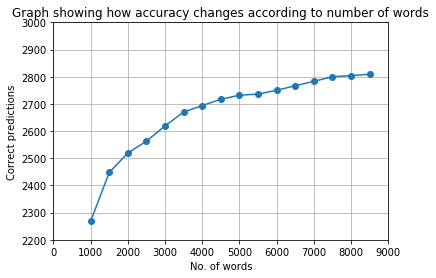

In [42]:
plt.plot(x, y, 'o-')
plt.axis([0, 9000, 2200, 3000])
plt.title("Graph showing how accuracy changes according to number of words")
plt.xlabel("No. of words")
plt.ylabel("Correct predictions")
plt.grid(True)
plt.show()

## Using sklearn MultinomialNB classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
def XTrain(dictionary, wd_keys, folders_name):
    X = []
    for folder in folders_name:
        subd = dictionary[folder]
        l = []
        for key in wd_keys:
            l.append(subd[key])
        X.append(l)
    return np.array(X)

In [47]:
def XTest(file_path, wd):
    X_test = []
    for file in file_path:
        l = read_file(file)
        pure_words = clean_data(l)
        td = wd.copy()
        for word in pure_words:
            if(word not in wd_keys):
                continue
            else:
                td[word] += 1
        wlist = []
        for w in wd_keys:
            wlist.append(td[w])
        X_test.append(wlist)
    return np.array(X_test)

In [48]:
test_path = "C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\textTrainSplit\\20_newsgroups_test"
folders_name, folders_path, file_path = files_path(test_path)

In [49]:
clf = MultinomialNB()
X_train = XTrain(dictionary, wd_keys, folders_name)
clf.fit(X_train, folders_name)   # training with 800 files of each newsgroup

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
X_test = XTest(file_path, dict_imp_words)
nb_pr = clf.predict(X_test)     # testing with 200 files of each newsgroup 

## Comparison between implemented and inbuilt multinomial naive bayes

In [43]:
percent = score(test_path, predictions)   # implemented naive bayes correct ratio when used 800 files as training and 200 as testing

In [44]:
percent

0.67525

In [51]:
nb_score = score(test_path, nb_pr)        # inbuilt naive bayes correct ratio when used 800 files as training and 200 as testing

In [52]:
nb_score

0.677

## Final training and testing

### with implemented naive bayes

In [59]:
# training with 1000 files of each newsgroup
dictionary, wd_keys, dict_imp_words = build_dictionary("C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\text data\\20_newsgroups", 7500)

In [61]:
# testing with 100 files of each newsgroup from mini newsgroup
test_path = "C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\mini_newsgroups"
predictions = predict(dictionary, test_path)

In [62]:
percent = score(test_path, predictions)   # implemented naive bayes correct ratio

In [63]:
percent

0.807

### with inbuilt naive bayes

In [64]:
test_path = "C:\\Users\\AAKASH\\Desktop\\Temporary\\CN ML attachments\\mini_newsgroups"
folders_name, folders_path, file_path = files_path(test_path)

In [65]:
clf = MultinomialNB()
X_train = XTrain(dictionary, wd_keys, folders_name)
clf.fit(X_train, folders_name)   # training with 1000 files of each newsgroup

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
X_test = XTest(file_path, dict_imp_words)
nb_pr = clf.predict(X_test)     # testing with 100 files of each newsgroup from mini newsgroup

In [67]:
nb_score = score(test_path, nb_pr)        # inbuilt naive bayes correct ratio

In [68]:
nb_score

0.805